In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import os, sys

from activation import *
from loss import *
from linear import * 
from encapsulage import *
from utils import *

In [2]:
# Création des données artificielles
X_train, y_train = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
X_test, y_test = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))


# Création du réseau
net = Sequentiel([])
net.add_module(Linear(X_train.shape[1], 20))
net.add_module(TanH())
net.add_module(Linear(20, 1))
net.add_module(Sigmoid())


# Initialisation de l'optimiseur
loss = MSELoss()
optim = Optim(net, loss, eps=1e-2)

# Entraînement avec SGD
batch_size = 200
epochs = 1000

loss  = optim.SGD(X_train, y_train, batch_size, epochs)


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 782.76it/s]


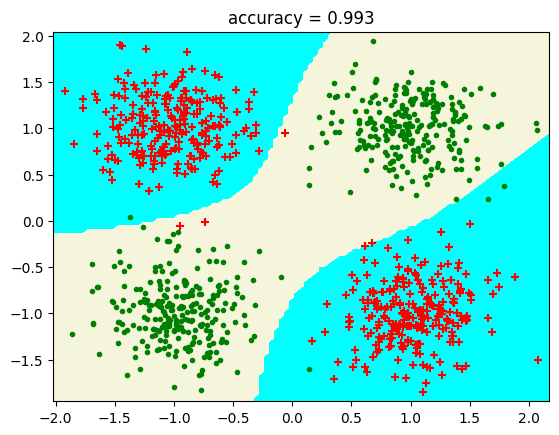

In [3]:
def predict(X_test):
    out = np.array(optim.net.forward(X_test)[-1])
    res = np.where(out >= 0.5,1 ,0 )
    return res

def accuracy(X_test,y_test):
    out = np.array(optim.net.forward(X_test)[-1])
    res = np.where(out >= 0.5,1 ,0 )
    acc = np.sum(res == y_test)/len(y_test)
    return acc

acc = accuracy(X_test,y_test)
plt.figure()
plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("accuracy = "+str(acc))
plt.show()